In [1]:
# Basic image processing using python
# we'll work with the kaggle dataset of 96x96x3(RGB) patches
# using patches allows us to focus on the mechanics of image manipulation, without the complexity of large heterogenous WSI


In [2]:
## We'll initially work with scikit-image, though opencv and pillow are also frequently used in image processing in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import os



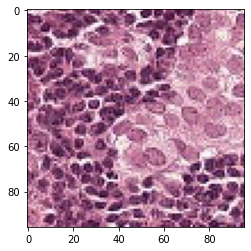

In [3]:
## begin by loading a small subset of the patches in the kaggle dataset
## 

testFilesLoc="/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test"

testimageLoc=os.path.join(testFilesLoc, "00006537328c33e284c973d7b39d340809f7271b.tif")
testimage=io.imread(testimageLoc)
testimage.shape
plt.imshow(testimage)

In [4]:
## create a list and populate it with image locations
## use the list to read in the images to a new list to manipulate
### lots of ways to do this, including glob(which behaves like unix) and walk(which returns a 2 column list of files and directories and is better for complex directory structures)

imlocs=[]


In [5]:
#locs=os.walk(testFilesLoc)
#count = 0
#for loc in locs: 
#    print(loc)

In [6]:
import glob

imlocs = [f for f in glob.glob(testFilesLoc+"/*.tif")]
imlocs_small=imlocs[0:6]
imlocs_small

['/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/fd0a060ef9c30c9a83f6b4bfb568db74b099154d.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/1f9ee06f06d329eb7902a2e03ab3835dd0484581.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/19709bec800f372d0b1d085da6933dd3ef108846.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/7a34fc34523063f13f0617f7518a0330f6187bd3.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/93be720ca2b95fe2126cf2e1ed752bd759e9b0ed.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/761dde7de22cb39a0dd67ce472163d66e5ac1568.tif']

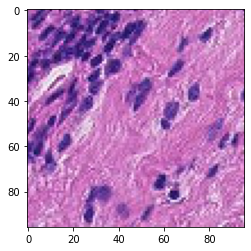

In [7]:
imfiles_small=[]

for imloc in imlocs_small: 
    imfiles_small.append(io.imread(imloc))
    
imfiles_small[1]
plt.imshow(imfiles_small[0])

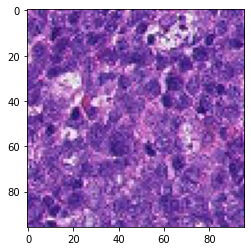

In [8]:
## Two ways to work with lists in python that make sense to my R brain

a=list(map(plt.imshow, imfiles_small))

b=[plt.imshow(imfile) for imfile in imfiles_small] 
    



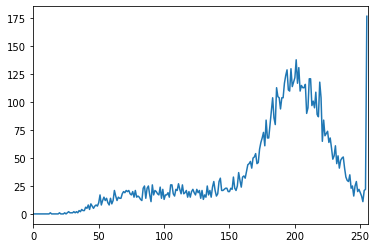

In [9]:
## Having generated a list of images to play with, lets play
## We'll begin with the most basic sorts of image analysis
## Lets observe the distribution of intensities for our images by generating simple histograms
## this isn't even really an image operation, we're simply summarizing the contents of the np arrays generated by reading in images
## NOTE: np.histogram() returns a tuple - the the histogram values and the bin edges
## NOTE: both components of np.histogram are necessary to plot the histogram

list_histograms=list(map(lambda imfile: np.histogram(imfile[:,:,0], bins = 256, range=(0,1)), imfiles_small))

list_histograms_comp=[np.histogram(imfile[:,:,0], bins=256, range=(0,256)) for imfile in imfiles_small]

a = list_histograms_comp[0]
a1 = a[1]
a0 = a[0]
a1

plt.xlim([0, 256])
plt.plot(a1[0:-1], a0)


In [17]:
def plotHist(histTuple, color = 0): 
    vals_hist = histTuple[0]
    vals_bins = histTuple[1]
    
    plt.xlim([0, 256])
    plt.title("Grayscale Histogram")
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    thePlot=plt.plot(a1[0:-1], a0)
    return thePlot

def getHist_color(imfile):
    colorList = ["r", "g", "b"]
    hists_color = [np.histogram(imfile[:,:,ind], bins = 256, range=(0,256)) for ind, color in  enumerate(colorList)]
    return hists_color

def plotHist_color(histTuple, colorVal): 
    vals_hist = histTuple[0]
    vals_bins = histTuple[1]
    
    plt.xlim([0, 256])
    thePlot=plt.plot(vals_bins[0:-1], vals_hist, color=colorVal)
    return thePlot

def viewHists_color(imfile): 
    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)

    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            imfile[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)

    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.title("3 Color Histogram")
    plt.show()



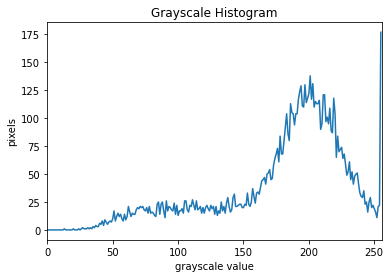

In [11]:
a = list_histograms_comp[0]

plotHist(a)



In [14]:
list_histograms_color = [getHist_color(hist) for hist in imfiles_small]

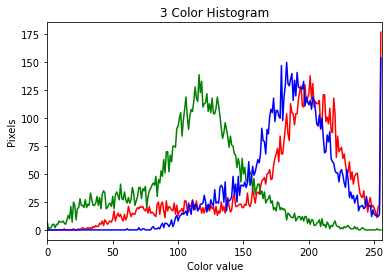

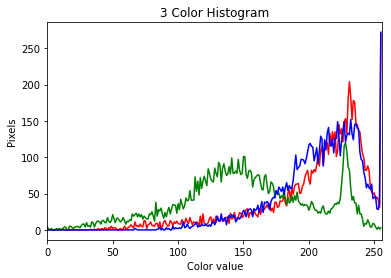

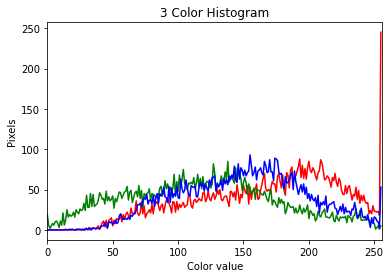

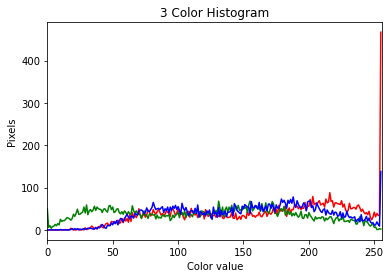

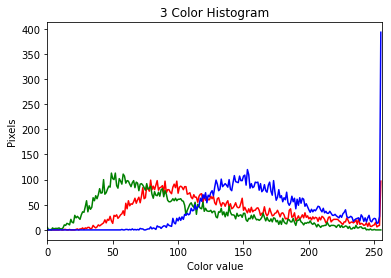

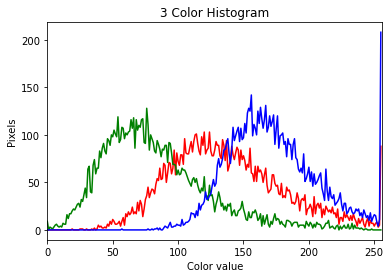

[[None, None, None, None, None, None]]

In [19]:


[[viewHists_color(imfile) for imfile in imfiles_small]]

In [21]:
list_colorHist=[getHist_color(imageFile) for imageFile in imfiles_small]

In [22]:
list_colorHist

[[(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,
            1,   2,   1,   1,   1,   2,   1,   2,   1,   3,   2,   4,   3,
            3,   6,   5,   8,   4,   9,   7,   5,   7,   8,   7,  10,  17,
            8,  12,  15,  12,  14,  10,   8,  14,   9,  12,  21,  16,  12,
           15,  14,  14,  18,  20,  19,  21,  20,  21,  18,  17,  20,  15,
           21,  15,  16,  15,  13,  12,  23,  25,  14,  23,  25,  17,  11,
           26,  17,  21,  20,  18,  17,  24,  14,  22,  13,  17,  17,  19,
           15,  26,  26,  18,  16,  22,  21,  27,  22,  18,  26,  18,  19,
           21,  15,  20,  15,  20,  22,  19,  17,  22,  19,  21,  14,  21,
           13,  17,  15,  25,  17,  21,  15,  24,  29,  21,  16,  18,  29,
           32,  21,  21,  22,  23,  23,  20,  20,  23,  22,  33,  23,  21,
           25,  37,  30,  24,  33,  34,  32,  38,  44,  45,  47,  41,  50,
           51,  54,  45, 

In [20]:
## Next create a simple mask based on an intensity threshold
def applyThresholdMask(imageFile, threshold): 
    mask = imageFile < threshold
    imageFile[mask] = 0
    imageFile

    

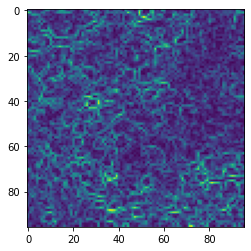

In [23]:
## Explore some of the built-in filters from skimage
## We'll import edge detection filters and see what they do with our test images
from skimage.filters import roberts, sobel, scharr
test_roberts = roberts(testimage[:,:,0])
plt.imshow(test_roberts)

In [28]:
### Roberts edge detection filter
#### The above call to roberts() applies the "robert's cross" algorithm to detect edges (https://en.wikipedia.org/wiki/Roberts_cross) 
#### as implemented https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.roberts
imfiles_small_roberts=[]
#### The operation can be applied to the collection of images with a list comprehension: 
imfiles_small_roberts=[[roberts(image[:,:,colorVal]) for image in imfiles_small] for colorVal in [0,1,2]]

In [25]:
#### as detailed in the article, the robert's cross method looks for continuity in adjacent pixel intensity using teh geometric distance
#### this approach is conceptually straightforward, but more sensitive to noise than more complex methods

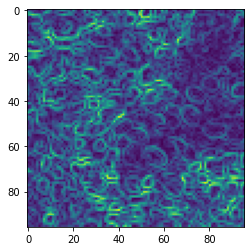

In [29]:
## Explore some of the built-in filters from skimage
## Next look at filtering and edge detection with the "Sobel Operator" https://en.wikipedia.org/wiki/Sobel_operator
### Like the roberts operator, it is based on a gradient of pixel intensity by x,y position
### like th roberts operator, it uses relatively simple steps to produce reasonable edge detection results, but is sensitive to high frequency noise
test_sobel = sobel(testimage[:,:,0])
plt.imshow(test_sobel)

imfiles_small_sobel=[]
imfiles_small_sobel=[[sobel(image[:,:, colorVal]) for image in imfiles_small] for colorVal in [0,1,2]]


In [31]:
imfiles_small_sobel[1]

[array([[0.01862745, 0.01525132, 0.03854824, ..., 0.07559199, 0.2181345 ,
         0.30261103],
        [0.01376046, 0.04421558, 0.10396318, ..., 0.10275427, 0.1230812 ,
         0.14310032],
        [0.04118814, 0.12320998, 0.19705638, ..., 0.14613106, 0.06323339,
         0.00620054],
        ...,
        [0.05374302, 0.04895093, 0.0509521 , ..., 0.01176471, 0.18428504,
         0.22536442],
        [0.0258831 , 0.05136544, 0.08073218, ..., 0.04211124, 0.1087661 ,
         0.14706209],
        [0.06594914, 0.07936939, 0.03164708, ..., 0.08125434, 0.10566881,
         0.04937129]]),
 array([[0.04080128, 0.07199043, 0.05409064, ..., 0.00930082, 0.01362004,
         0.02941176],
        [0.04188237, 0.06690413, 0.08819716, ..., 0.02499519, 0.04095411,
         0.04742505],
        [0.15194813, 0.09038769, 0.06932419, ..., 0.04954619, 0.06731233,
         0.06885816],
        ...,
        [0.04433498, 0.04624501, 0.04423731, ..., 0.25264841, 0.23333333,
         0.11838007],
        [0.1

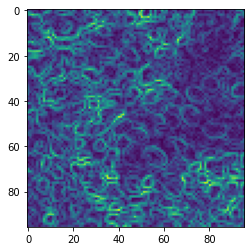

In [32]:
## Explore some of the built-in filters from skimage
## Next look at filtering and edge detection with the "scharr Operator" https://en.wikipedia.org/wiki/scharr_operator
### This filter attempts to minimize the weigthed mean squared angular error in teh fourier domain for pixel intesity
test_scharr = scharr(testimage[:,:,0])
plt.imshow(test_scharr)

imfiles_small_scharr=[]
imfiles_small_scharr=[[scharr(image[:,:, colorVal]) for image in imfiles_small] for colorVal in [0,1,2]]



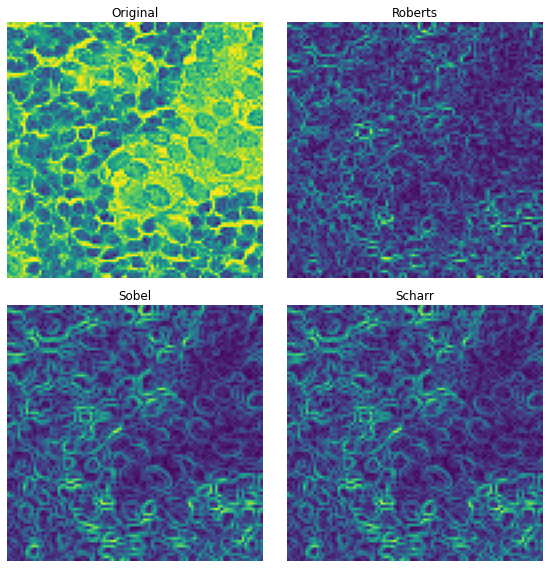

In [38]:
### Lets compare the results of the three filters on a plot with three subplots

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage[:,:,0])
ax[0].set_title("Original")

ax[1].imshow(test_roberts)
ax[1].set_title("Roberts")

ax[2].imshow(test_sobel)
ax[2].set_title("Sobel")

ax[3].imshow(test_scharr)
ax[3].set_title("Scharr")

for a in ax: 
    a.axis("off")
    
plt.tight_layout()
plt.show()

In [39]:
### Notice that while all the images are able to detect some of the edges, they all struggle in particular with edge detection against bright backgrounds

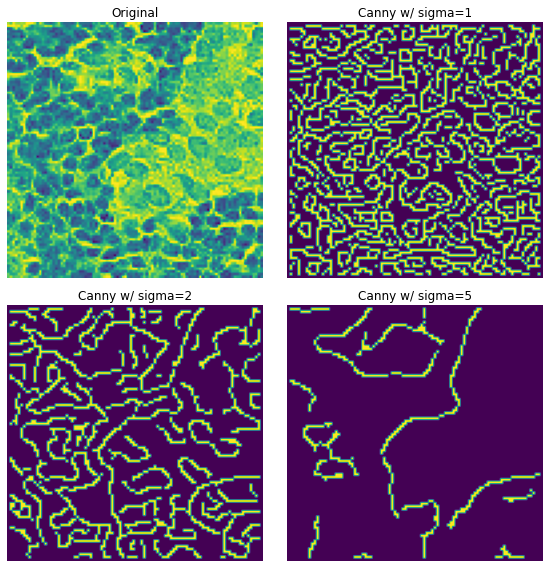

In [57]:
## Next lets employ "Canny" edge detection, https://en.wikipedia.org/wiki/Canny_edge_detector
### "Canny" edge detectino is a multi-step edge detection algorithm developed by John F Canny
### Unlike the above filters, this algorithm applies multiple blurring and edge detection filters to yeild a final output
from skimage.feature import canny

test_canny_sig1=canny(testimage[:,:,0],sigma = 1)

test_canny_sig2=canny(testimage[:,:,0],sigma = 2)

test_canny_sig5=canny(testimage[:,:,0],sigma = 3)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage[:,:,0])
ax[0].set_title("Original")

ax[1].imshow(test_canny_sig1)
ax[1].set_title("Canny w/ sigma=1")

ax[2].imshow(test_canny_sig2)
ax[2].set_title("Canny w/ sigma=2")

ax[3].imshow(test_canny_sig5)
ax[3].set_title("Canny w/ sigma=5")

for a in ax: 
    a.axis("off")
    
plt.tight_layout()
plt.show()

### Canny edge detection is based on an entire theory of edge detection with the following criteria: $
#### Algorithms should have low error rate, to preserve the overall shape of the target
#### "edge points" returned should accurately reflect the location of the edge
#### "edge points" should not be duplicated, noise should be unlikely to create false edges

The algorithm achieves these ends through a multi-step approach
A gaussian filter blurs noise initially, to achieve goal 3
a gradient filter is then applied to highlight edges in the blurred image
a threshold is used to filter edges suggested by the blurred image gradient
Bounding double thresholds are applied and edges are defined by connectivity

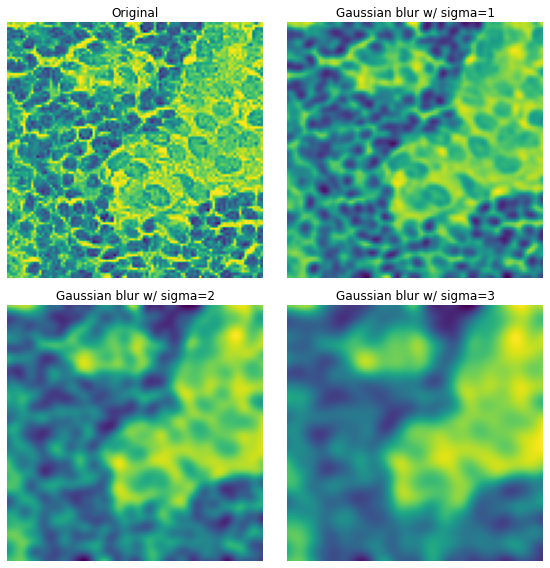

In [67]:
### canny edge detection uses a gaussian blur to smooth out noisy parts of the image prior to edge detection
#### A gaussian kernel changes the intensity of a pixel based on the weighted average of the intensities of the pixels around it
#### The sigma quantity specifies the width of the distribution used to weight nearby pixels for the filter
#### This application of gaussian blur to reduce noise in an image is an example of its use as a "Low Pass Filter"
#### A blur like this is ideally suited to reducing noise from a source that produces noise following a gaussian distribution
#### Lets look at what a few blurring filter
from skimage.filters import gaussian

test_gaussian_sigOne = gaussian(testimage[:,:,0], sigma = (1,1), truncate = 4, multichannel = False)
test_gaussian_sigTwo = gaussian(testimage[:,:,0], sigma = (2,2), truncate = 4, multichannel = False)
test_gaussian_sigThree = gaussian(testimage[:,:,0], sigma = (3,3), truncate = 4, multichannel = False)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage[:,:,0])
ax[0].set_title("Original")

ax[1].imshow(test_gaussian_sigOne)
ax[1].set_title("Gaussian blur w/ sigma=1")

ax[2].imshow(test_gaussian_sigTwo)
ax[2].set_title("Gaussian blur w/ sigma=2")

ax[3].imshow(test_gaussian_sigThree)
ax[3].set_title("Gaussian blur w/ sigma=3")

for a in ax: 
    a.axis("off")
    
plt.tight_layout()
plt.show()

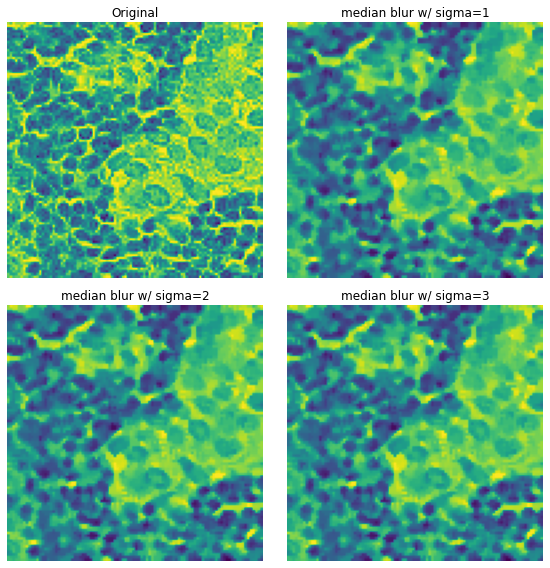

In [68]:
### While the median filter is useful for noise following a normal distribution, noise is rarely so neat
#### Non-normally distributed noise requires a nuanced approach, so lets review the basic filters that may contribute to a larger noise reduction algorithm
#### the "Median" filter is useful for "static" noise
#### Disc size influences the effect of the median filter
from skimage.filters import median
from skimage.morphology import disk


test_median_sigOne = median(testimage[:,:,0])
test_median_sigTwo = median(testimage[:,:,0])
test_median_sigThree = median(testimage[:,:,0])

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage[:,:,0])
ax[0].set_title("Original")

ax[1].imshow(test_median_sigOne)
ax[1].set_title("median blur w/ sigma=1")

ax[2].imshow(test_median_sigTwo)
ax[2].set_title("median blur w/ sigma=2")

ax[3].imshow(test_median_sigThree)
ax[3].set_title("median blur w/ sigma=3")

for a in ax: 
    a.axis("off")
    
plt.tight_layout()
plt.show()

In [58]:
### Edge Detection filters can be combined with boolean filters to create object masks

In [59]:
test_canny


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
## Next lets employ an "entropy filter"
### This will look at the complexity of the region around a point
from skimage.filters.rank import entropy
from skimage.morphology import disk


test_canny_sig1=canny(testimage[:,:,0],sigma = 1)

test_canny_sig2=canny(testimage[:,:,0],sigma = 2)

test_canny_sig5=canny(testimage[:,:,0],sigma = 3)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage[:,:,0])
ax[0].set_title("Original")

ax[1].imshow(test_canny_sig1)
ax[1].set_title("Canny w/ sigma=1")

ax[2].imshow(test_canny_sig2)
ax[2].set_title("Canny w/ sigma=2")

ax[3].imshow(test_canny_sig5)
ax[3].set_title("Canny w/ sigma=5")

for a in ax: 
    a.axis("off")
    
plt.tight_layout()
plt.show()